# Data Integration for further analysis

### Description:

Identify an additional feature that you could add to the data that would help
better understand the dataset and give further insights.

#### After extracting the data, you need to perform the following:
1. Encode the feature and add the original and encoded values to the lookup table (if label encoding was performed).
2. Scaling/Normalization
3. Ask 2 questions related to the feature you just extracted and visualize your findings.


In [4]:
# Import Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read accidents df
df_accidents = pd.read_csv("./Datasets/accidents_1983.csv")

In [12]:
# read vehicle df
df_vechiles = pd.read_csv("./Datasets/vehicle_1983.csv")

In [13]:
# explore accidents
df_accidents.head()

,Unnamed: 0,accident_year,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,lsoa_of_accident_location,day_hour,accident_reference
0,0,1983,530080.0,180430.0,Metropolitan Police,Slight,2,2,04/01/1983,Tuesday,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining + high winds,Wet or damp,None,None,-1,1,010AD0001
1,1,1983,530120.0,179580.0,Metropolitan Police,Slight,2,2,01/01/1983,Saturday,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,-1,0,010AD0002
2,2,1983,530060.0,180310.0,Metropolitan Police,Slight,1,1,05/01/1983,Wednesday,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,-1,14,010AD0004
3,3,1983,530070.0,180420.0,Metropolitan Police,Slight,2,1,05/01/1983,Wednesday,...,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,Fine + high winds,Wet or damp,None,None,-1,22,010AD0005
4,4,1983,530350.0,180300.0,Metropolitan Police,Slight,3,1,09/01/1983,Sunday,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,-1,17,010AD0006


In [14]:
# explore accidents
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242842 entries, 0 to 242841
Data columns (total 30 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               242842 non-null  int64  
 1   accident_year                            242842 non-null  int64  
 2   location_easting_osgr                    242842 non-null  float64
 3   location_northing_osgr                   242842 non-null  float64
 4   police_force                             242842 non-null  object 
 5   accident_severity                        242842 non-null  object 
 6   number_of_vehicles                       242842 non-null  int64  
 7   number_of_casualties                     242842 non-null  int64  
 8   date                                     242842 non-null  object 
 9   day_of_week                              242842 non-null  object 
 10  time                            

In [15]:
# explore vechiles
df_vechiles.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,1983010AD0001,1983,010AD0001,1,109,0,18,1.1,6,0.1,...,1.2,18.1,4.1,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,-1.9
1,1983010AD0001,1983,010AD0001,2,19,0,18,2.0,7,0.0,...,1.0,44.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,1983010AD0002,1983,010AD0002,1,109,0,1,7.0,3,0.0,...,1.0,24.0,5.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,1983010AD0002,1983,010AD0002,2,109,0,2,0.0,0,0.0,...,1.0,35.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,1983010AD0004,1983,010AD0004,1,109,0,18,5.0,1,0.0,...,1.0,41.0,7.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [16]:
# explore vechiles
df_vechiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409690 entries, 0 to 409689
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   accident_index                    409690 non-null  object 
 1   accident_year                     409690 non-null  int64  
 2   accident_reference                409690 non-null  object 
 3   vehicle_reference                 409690 non-null  int64  
 4   vehicle_type                      409690 non-null  int64  
 5   towing_and_articulation           409690 non-null  int64  
 6   vehicle_manoeuvre                 409690 non-null  int64  
 7   vehicle_direction_from            409690 non-null  float64
 8   vehicle_direction_to              409690 non-null  int64  
 9   vehicle_location_restricted_lane  409690 non-null  float64
 10  junction_location                 409690 non-null  int64  
 11  skidding_and_overturning          409690 non-null  f

In [17]:
# explore vechiles null values
df_vechiles.isnull().sum()

accident_index                      0
accident_year                       0
accident_reference                  0
vehicle_reference                   0
vehicle_type                        0
towing_and_articulation             0
vehicle_manoeuvre                   0
vehicle_direction_from              0
vehicle_direction_to                0
vehicle_location_restricted_lane    0
junction_location                   0
skidding_and_overturning            0
hit_object_in_carriageway           0
vehicle_leaving_carriageway         0
hit_object_off_carriageway          0
first_point_of_impact               0
vehicle_left_hand_drive             0
journey_purpose_of_driver           0
sex_of_driver                       0
age_of_driver                       0
age_band_of_driver                  0
engine_capacity_cc                  0
propulsion_code                     0
age_of_vehicle                      0
generic_make_model                  0
driver_imd_decile                   0
driver_home_

__There is no null values, two df ready to be integrated__

### Select feature to integrate
I will select __age_of_driver__, i think will give me further insights about the drivers and the accidents, I will use __accident_reference__ as the Column to integrate based on it

In [18]:
# get the required columns
df_vechiles = df_vechiles[["accident_reference", "age_of_driver"]]

In [19]:
df_vechiles

,accident_reference,age_of_driver
0,010AD0001,18.1
1,010AD0001,44.0
2,010AD0002,24.0
3,010AD0002,35.0
4,010AD0004,41.0
...,...,...
409685,981886548,19.0
409686,981886548,60.0
409687,981886548,30.0
409688,981887549,75.0


### integrate the two dfs

In [20]:
df_accidents_integrated = df_accidents.merge(df_vechiles, on = "accident_reference")

In [21]:
df_accidents_integrated

,Unnamed: 0,accident_year,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,lsoa_of_accident_location,day_hour,accident_reference,age_of_driver
0,0,1983,530080.0,180430.0,Metropolitan Police,Slight,2,2,04/01/1983,Tuesday,...,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining + high winds,Wet or damp,None,None,-1,1,010AD0001,18.1
1,0,1983,530080.0,180430.0,Metropolitan Police,Slight,2,2,04/01/1983,Tuesday,...,Pedestrian phase at traffic signal junction,Darkness - lights lit,Raining + high winds,Wet or damp,None,None,-1,1,010AD0001,44.0
2,1,1983,530120.0,179580.0,Metropolitan Police,Slight,2,2,01/01/1983,Saturday,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,-1,0,010AD0002,24.0
3,1,1983,530120.0,179580.0,Metropolitan Police,Slight,2,2,01/01/1983,Saturday,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,-1,0,010AD0002,35.0
4,2,1983,530060.0,180310.0,Metropolitan Police,Slight,1,1,05/01/1983,Wednesday,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,-1,14,010AD0004,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407807,242874,1983,205700.0,560500.0,Dumfries and Galloway,Slight,3,2,30/12/1983,Friday,...,No physical crossing facilities within 50 metres,Daylight,Other,Wet or damp,None,None,-1,14,981886548,19.0
407808,242874,1983,205700.0,560500.0,Dumfries and Galloway,Slight,3,2,30/12/1983,Friday,...,No physical crossing facilities within 50 metres,Daylight,Other,Wet or damp,None,None,-1,14,981886548,60.0
407809,242874,1983,205700.0,560500.0,Dumfries and Galloway,Slight,3,2,30/12/1983,Friday,...,No physical crossing facilities within 50 metres,Daylight,Other,Wet or damp,None,None,-1,14,981886548,30.0
407810,242875,1983,291200.0,586300.0,Dumfries and Galloway,Slight,2,1,30/12/1983,Friday,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Wet or damp,None,None,-1,12,981887549,75.0


In [22]:
# drop id column
df_accidents_integrated.drop("accident_reference", axis = 1, inplace = True)

## Preprocessing for the new df

In [23]:
# null values count
df_accidents_integrated.isnull().sum()

Unnamed: 0                                 0
accident_year                              0
location_easting_osgr                      0
location_northing_osgr                     0
police_force                               0
accident_severity                          0
number_of_vehicles                         0
number_of_casualties                       0
date                                       0
day_of_week                                0
time                                       0
local_authority_district                   0
local_authority_ons_district               0
local_authority_highway                    0
first_road_class                           0
road_type                                  0
speed_limit                                0
junction_detail                            0
junction_control                           0
second_road_class                          0
pedestrian_crossing_human_control          0
pedestrian_crossing_physical_facilities    0
light_cond

In [24]:
df_accidents_integrated.describe(include = "all")

,Unnamed: 0,accident_year,location_easting_osgr,location_northing_osgr,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,lsoa_of_accident_location,day_hour,age_of_driver
count,407812.000000,407812.0,407812.000000,407812.000000,407812,407812,407812.000000,407812.000000,407812,407812,...,407812,407812,407812,407812,407812,407812,407812,407812.0,407812.000000,407812.000000
unique,NaN,NaN,NaN,NaN,51,3,NaN,NaN,365,7,...,4,6,5,8,5,6,6,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Metropolitan Police,Slight,NaN,NaN,25/11/1983,Friday,...,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,80489,302496,NaN,NaN,2273,71005,...,406065,356788,288215,319994,269222,397502,395254,NaN,NaN,NaN
mean,121390.855892,1983.0,436382.644160,273568.781326,NaN,NaN,1.964734,1.202471,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,14.254968,31.140271
std,69583.435669,0.0,116256.111272,151743.055088,NaN,NaN,0.833449,0.401842,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5.272521,16.823002
min,0.000000,1983.0,3700.000000,3300.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.000000,-1.000000
25%,60666.750000,1983.0,380900.000000,173530.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,11.000000,20.000000
50%,122830.500000,1983.0,448200.000000,215500.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,15.000000,29.000000
75%,180959.000000,1983.0,525662.500000,382370.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,18.000000,41.000000


### Outlier detection for the new feature

<AxesSubplot:xlabel='age_of_driver'>

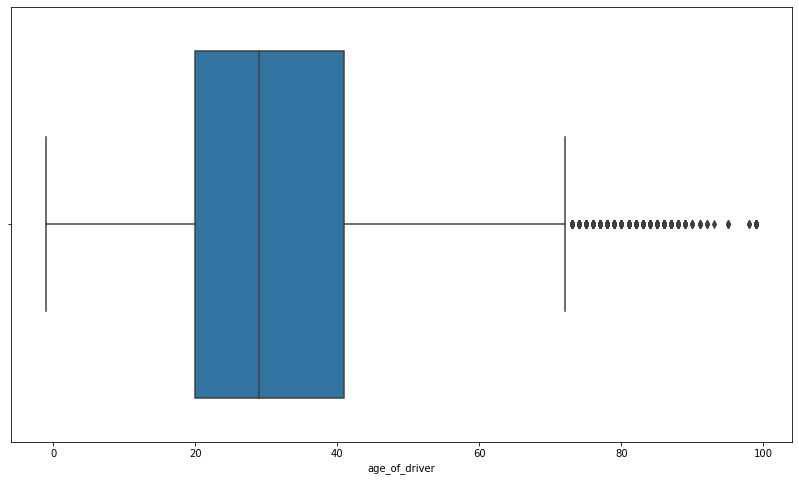

In [25]:
# plot box plot to detect outlier
plt.figure(figsize=(14, 8))
sns.boxplot(data = df_accidents_integrated, x = "age_of_driver")

In [26]:
# determine the IQR
Q1 = df_accidents_integrated['age_of_driver'].quantile(0.25)
Q3 = df_accidents_integrated['age_of_driver'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

21.0


In [27]:
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
print(lower,upper)

-11.5 72.5


In [28]:
# get the number of outliers
df1 = df_accidents_integrated[df_accidents_integrated['age_of_driver']> upper]
df2 = df_accidents_integrated[df_accidents_integrated['age_of_driver'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 5225


#### impute the outliers to the IQR upper value

In [29]:
# def impute function
# impute values higher 72 by 72
# impute values lower 18 by 18

def impute_age_outliers(x, upper):
    if x > upper:
        x = upper
        return x
    
    elif x < 18:
        x = 18
        return x
    else:
        return x 

In [30]:
df_accidents_integrated['age_of_driver'] = df_accidents_integrated['age_of_driver'].apply(lambda x: impute_age_outliers(x, upper))

<AxesSubplot:xlabel='age_of_driver'>

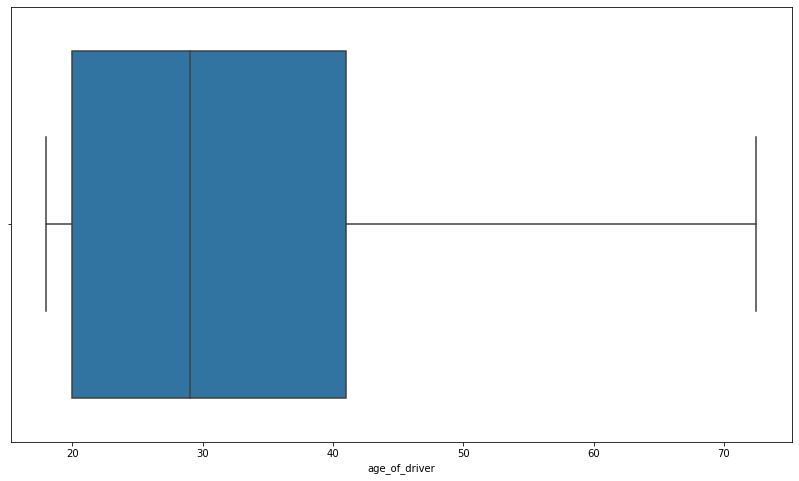

In [31]:
# draw box plot to check the outlier
plt.figure(figsize=(14, 8))
sns.boxplot(data = df_accidents_integrated, x = "age_of_driver")

## EDA For the New Features

### Q1 : What is the age distribution of accidents drivers?

Text(0.5, 1.0, 'Age distribution of accidents drivers')

<Figure size 1008x576 with 0 Axes>

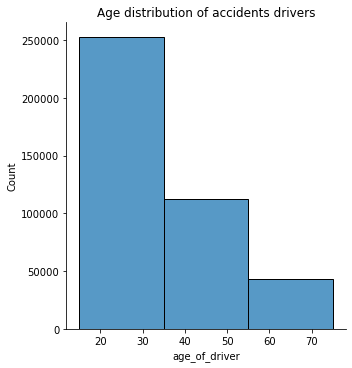

In [32]:
# plot distribution plot for age of driver feature
plt.figure(figsize=(14,8))
bins = np.arange(15, 85, 20)
sns.displot(data = df_accidents_integrated, x = "age_of_driver", bins = bins)
plt.title("Age distribution of accidents drivers")

__<span style="color:red">Youth peolpe has higher accident rate more than middle age and old people, as people get old their drives become more careful</span>__

### Q2 : What is the average age of accidents drivers  per each accident severity?

Text(0, 0.5, 'age_of_driver')

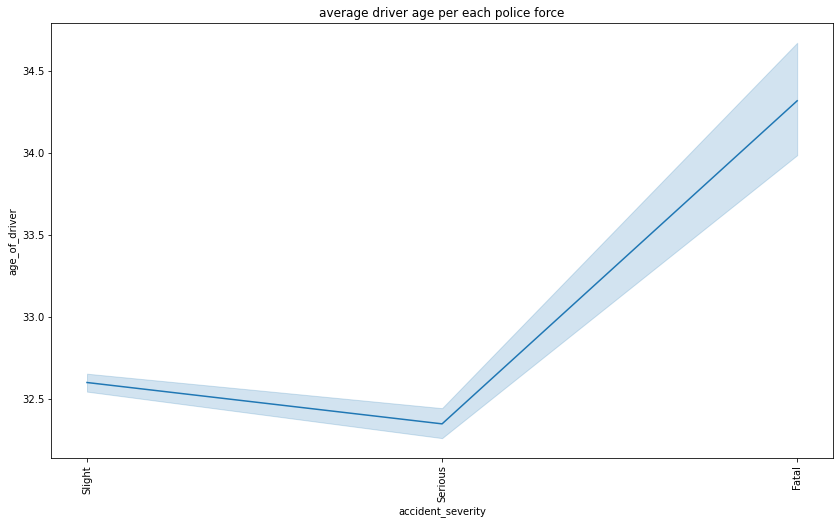

In [33]:
# plot the accident freqency for each police office
plt.figure(figsize=(14,8))
base_color = sns.color_palette()[0]
sns.lineplot(data = df_accidents_integrated, x = "accident_severity", y = "age_of_driver", color = base_color)
plt.xticks(rotation = 90)
plt.title("average driver age per each police force")
plt.xlabel('accident_severity')
plt.ylabel('age_of_driver')

__<span style="color:red">slight accidents has lowest average age, fatal accidents has the highest average age although it has the lowest frequency between accidents.<br></span>__

__<span style="color:red">This mean the fatal accident happen more with old and middle age people</span>__